# Cars and tanks trial run

In [19]:
# Preference variables
LAST_TRAIN_MODE=False

In [20]:
import os
import requests
import pandas as pd
import numpy as np

model_file = "yolo11_cnt_last.pt" if LAST_TRAIN_MODE else "yolo11_cnt_best.pt"

if not os.path.exists(model_file):
    dl_link = {
        "yolo11_cnt_best.pt": "https://drive.google.com/uc?export=download&id=1zfCXSVrKpa38N9EauT-Z18xXgFPl6kuI",
        "yolo11_cnt_last.pt": "https://drive.google.com/uc?export=download&id=1_gkYs4yPl8kTgON-uJBKfsX3bAP5cf42"
    }

    with requests.get(dl_link[model_file], stream=True) as response:
        response.raise_for_status()
        with open(model_file, "wb") as f:
            for c in response.iter_content(chunk_size=1024 * 256):
                f.write(c)
        print("Pretrained file has been downloaded successfully.")


This notebook evaluates accuracy from external source images as well as annotate the object

In [21]:
from ultralytics import YOLO
import cv2

from pathlib import Path

img_data_dir = Path("data/images/")
imgs = [str(candidate)
        for ext_pattern in (
            '*.jpg',
            '*.png',
            '*.jpeg'
        )
        for candidate in img_data_dir.glob(ext_pattern)]

if not imgs:
    raise FileNotFoundError("Detection aborted due to no images with eligible extensions (JPG or PNG format) found.")

model = YOLO(model_file)

results = model.predict(imgs, conf=0.7, imgsz=256)

out_dir = Path("data/cnt_result/")

for idx, r in enumerate(results):
    origin_name = Path(imgs[idx]).stem
    export_path = out_dir / f"{origin_name}_predict.jpg"
    cv2.imwrite(str(export_path.absolute()), r.plot())


0: 256x256 car 1.00, tank 0.00, 0.9ms
1: 256x256 car 1.00, tank 0.00, 0.9ms
2: 256x256 car 1.00, tank 0.00, 0.9ms
3: 256x256 car 1.00, tank 0.00, 0.9ms
4: 256x256 car 1.00, tank 0.00, 0.9ms
5: 256x256 car 1.00, tank 0.00, 0.9ms
6: 256x256 car 1.00, tank 0.00, 0.9ms
7: 256x256 car 1.00, tank 0.00, 0.9ms
8: 256x256 car 1.00, tank 0.00, 0.9ms
9: 256x256 car 1.00, tank 0.00, 0.9ms
10: 256x256 car 1.00, tank 0.00, 0.9ms
11: 256x256 car 1.00, tank 0.00, 0.9ms
12: 256x256 car 1.00, tank 0.00, 0.9ms
13: 256x256 car 1.00, tank 0.00, 0.9ms
14: 256x256 car 1.00, tank 0.00, 0.9ms
15: 256x256 car 1.00, tank 0.00, 0.9ms
16: 256x256 car 1.00, tank 0.00, 0.9ms
17: 256x256 car 1.00, tank 0.00, 0.9ms
18: 256x256 car 1.00, tank 0.00, 0.9ms
19: 256x256 car 1.00, tank 0.00, 0.9ms
20: 256x256 car 1.00, tank 0.00, 0.9ms
21: 256x256 car 1.00, tank 0.00, 0.9ms
22: 256x256 car 1.00, tank 0.00, 0.9ms
23: 256x256 car 1.00, tank 0.00, 0.9ms
24: 256x256 car 0.88, tank 0.12, 0.9ms
25: 256x256 car 1.00, tank 0.00, 0

In [25]:


data = {
    'Probability means': [
        np.mean([float(r.probs.data[0]) for r in results[0:99]] # Car
                + [float(r.probs.data[1]) for r in results[100:200]]), # Tank
        np.mean([float(r.probs.data[1]) for r in results[0:99]] # Car (false detect as tank)
                + [float(r.probs.data[0]) for r in results[100:200]]), # Tank (false detect as car)
    ]
}

print("Probability mean of classification accuracy")
pd.DataFrame(data, index=["True", "False"])

Probability mean of classification accuracy


,Probability means
True,0.981575
False,0.018425


In [ ]:
conf_matrix = {
    "car": {
        "car": sum(r.probs.top1 == 0 for r in results[0:99]),
        "tank": sum(r.probs.top1 == 1 for r in results[0:99]),
    }, "tank": {
        "car": sum(r.probs.top1 == 0 for r in results[100:200]),
        "tank": sum(r.probs.top1 == 1 for r in results[100:200]),
    }
}

print("Confusion matrix")
pd.DataFrame(conf_matrix, index=["car", "tank"])

Confusion matrix


,car,tank
car,98,2
tank,1,98


1.0
1.0
1.0
1.0
1.0
1.0
0.9999983310699463
1.0
1.0
1.0
0.9999890327453613
1.0
1.0
0.9999972581863403
1.0
0.9999997615814209
1.0
1.0
1.0
1.0
1.0
0.9999991655349731
1.0
1.0
0.8782334923744202
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999998807907104
0.9999934434890747
0.9999594688415527
0.9999781847000122
1.0
1.0
1.0
0.9999865293502808
1.0
1.0
1.0
1.0
0.9999575614929199
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9701433181762695
1.0
0.9999997615814209
1.0
1.0
1.0
1.0
1.0
1.0
0.006410459987819195
1.0
1.0
1.0
1.0
1.0
0.9574360847473145
1.0
1.0
1.0
1.0
1.0
0.9999991655349731
1.0
1.0
1.0
1.0
1.0
1.0
0.9976567029953003
0.9999995231628418
1.0
1.0
1.0
1.0
5.721558977711538e-07
3.996653958893148e-06
0.0012363438727334142
0.001090378500521183
0.04204616695642471
0.029266150668263435
8.948735974456667e-09
0.00019660436373669654
2.344210042792838e-05
1.5676961311328341e-06
2.4713140422960578e-09
0.02109622210264206
4.581599544195569e-09
4.783064468938392e-06
0.000229

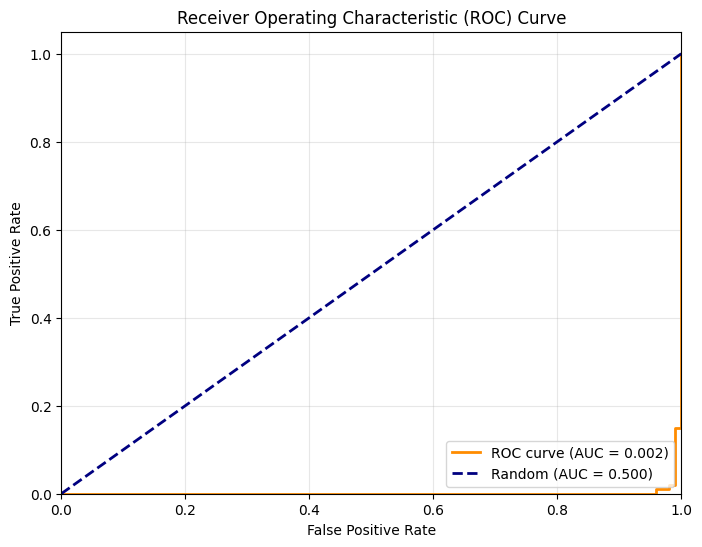

AUC Score: 0.002

Sample thresholds:
Threshold: inf → FPR: 0.000, TPR: 0.000
Threshold: 1.000 → FPR: 0.810, TPR: 0.000
Threshold: 1.000 → FPR: 0.820, TPR: 0.000
Threshold: 1.000 → FPR: 0.840, TPR: 0.000
Threshold: 1.000 → FPR: 0.850, TPR: 0.000
Threshold: 1.000 → FPR: 0.870, TPR: 0.000
Threshold: 0.998 → FPR: 0.960, TPR: 0.000
Threshold: 0.990 → FPR: 0.960, TPR: 0.010
Threshold: 0.957 → FPR: 0.980, TPR: 0.010
Threshold: 0.934 → FPR: 0.980, TPR: 0.020
Threshold: 0.878 → FPR: 0.990, TPR: 0.020
Threshold: 0.008 → FPR: 0.990, TPR: 0.150
Threshold: 0.006 → FPR: 1.000, TPR: 0.150
Threshold: 0.000 → FPR: 1.000, TPR: 1.000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prepare true labels and prediction scores
true_labels = []
pred_scores = []  # Scores for the positive class (tank)

# Assuming first 100 images are cars (class 0) and next 100 are tanks (class 1)
for idx, r in enumerate(results):
    # Get true label based on your dataset organization
    if idx < 100:  # First 100 are cars
        true_labels.append(0)  # Car = class 0
    else:  # Next 100 are tanks
        true_labels.append(1)  # Tank = class 1
    
    # Get probability for car class (class 0)
    # r.probs.data[0] = car probability, r.probs.data[1] = tank probability
    print(float(r.probs.data[0]))
    car_prob = float(r.probs.data[0])  # Probability for car class
    pred_scores.append(car_prob)

# Convert to numpy arrays
true_labels = np.array(true_labels)
pred_scores = np.array(pred_scores)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, pred_scores, pos_label=0)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Random (AUC = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Print AUC value
print(f"AUC Score: {roc_auc:.3f}")

# Optional: Display some thresholds
print("\nSample thresholds:")
for i in range(0, len(thresholds), max(1, len(thresholds)//10)):
    print(f"Threshold: {thresholds[i]:.3f} → FPR: {fpr[i]:.3f}, TPR: {tpr[i]:.3f}")